# Figure 03

## a) Yearly Mean Series

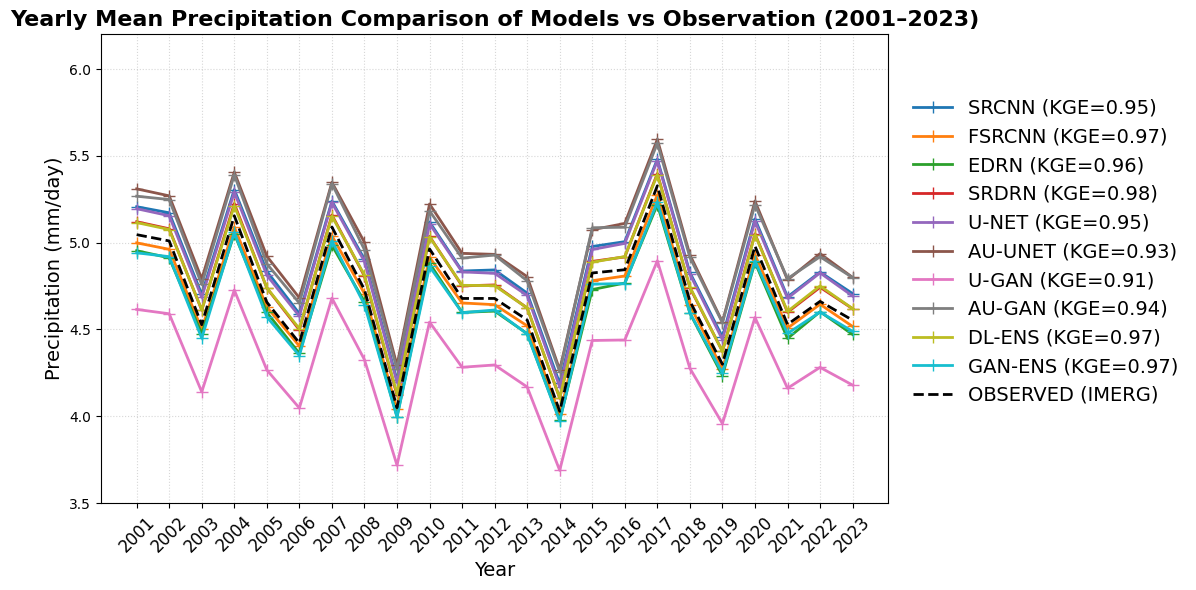

In [23]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import hydroeval as he

# KGE function
def kling_gupta_efficiency(y_true, y_pred):
    evaluations = y_true[~np.isnan(y_true)].flatten()
    simulations = y_pred[~np.isnan(y_pred)].flatten()    
    kge, r, alpha, beta = he.evaluator(he.kgeprime, simulations, evaluations)
    return kge[0]

# Load dataset
DPATH = "/home/midhunm/AI4KLIM/EXPMNTS/P02A_DeepDown_Generalization/ANALYSE/PLTDATA/FM07_YearMeanClim_AnnCycle"
dpath = f'{DPATH}/DATA_YEARMEAN_FLDMEAN_2001_2023.nc'
ds = xr.open_dataset(dpath)

# Define models and labels
models_dict = {
    'E01_M00': 'SRCNN',
    'E01_M01': 'FSRCNN',
    'E01_M02': 'EDRN',
    'E01_M03': 'SRDRN',
    'E01_M04': 'U-Net',
    'E01_M05': 'AU-Net',
    'E01_M07': 'U-GAN',
    'E01_M08': 'AU-GAN',
    'E01_END': 'DL-ENS',
    'E01_ENG': 'GAN-ENS',
}

# Paul Tol colorblind-friendly palette (8 colors)
colors = [
    '#1f77b4',  # blue
    '#ff7f0e',  # orange
    '#2ca02c',  # green
    '#d62728',  # red
    '#9467bd',  # purple
    '#8c564b',  # brown
    '#e377c2',  # pink
    '#7f7f7f',  # gray
    '#bcbd22',  # olive
    '#17becf',   # cyan
]

# Extract reference
ref = ds['REF'].values.flatten()

# Plotting setup
years = np.arange(2001, 2024)
x = np.arange(len(years))

# Create figure
plt.figure(figsize=(12, 6))

# Plot model lines with '+' markers
for i, (key, model_label) in enumerate(models_dict.items()):
    model_vals = ds[key].values.flatten()
    kge = kling_gupta_efficiency(model_vals, ref)
    label = f"{model_label} (KGE={kge:.2f})"
    plt.plot(x, model_vals, label=label, color=colors[i % len(colors)],
             linewidth=2, marker='+', markersize=8)

# Plot reference line
plt.plot(x, ref, linestyle='--', color='black', linewidth=2, label='OBSERVED (IMERG)')

# Customize plot
plt.xticks(ticks=x, labels=years, rotation=45, fontsize=12)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Precipitation (mm/day)', fontsize=14)
plt.title('Yearly Mean Precipitation Comparison of Models vs Observation (2001–2023)', fontsize=16, fontweight='bold')
plt.legend(fontsize=14, loc='upper center', ncol=1, bbox_to_anchor=(1.2, 0.9), frameon=False)
plt.ylim(3.5, 6.2)
plt.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()

# Optional save
# plt.savefig('/your/output/path/Figure_Yearly_KGE_Colorblind.jpg', dpi=300)

plt.show()


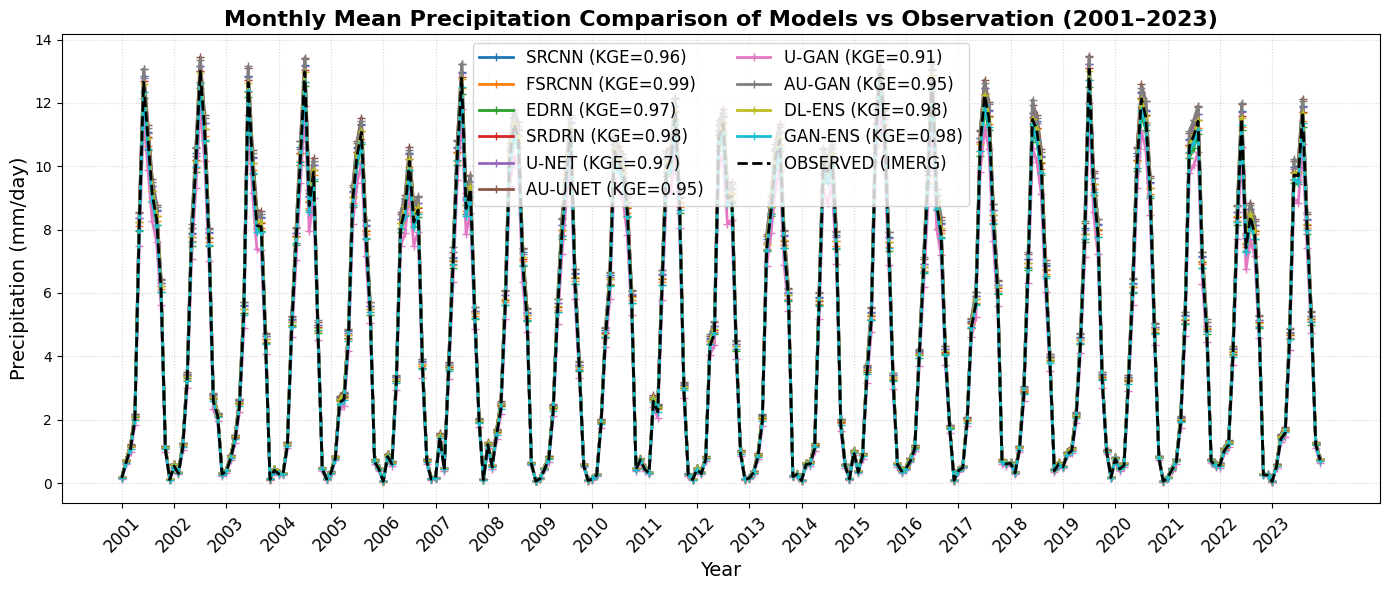

In [16]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import hydroeval as he

# KGE function
def kling_gupta_efficiency(y_true, y_pred):
    evaluations = y_true[~np.isnan(y_true)].flatten()
    simulations = y_pred[~np.isnan(y_pred)].flatten()
    kge, r, alpha, beta = he.evaluator(he.kgeprime, simulations, evaluations)
    return kge[0]

# Load dataset
DPATH = "/home/midhunm/AI4KLIM/EXPMNTS/P02A_DeepDown_Generalization/ANALYSE/PLTDATA/FM07_YearMeanClim_AnnCycle"
dpath = f'{DPATH}/DATA_MONMEAN_FLDMEAN_2001_2023.nc'  # <- monthly mean file
ds = xr.open_dataset(dpath)

# Define models and labels
models_dict = {
    'E01_M00': 'SRCNN',
    'E01_M01': 'FSRCNN',
    'E01_M02': 'EDRN',
    'E01_M03': 'SRDRN',
    'E01_M04': 'U-NET',
    'E01_M05': 'AU-UNET',
    'E01_M07': 'U-GAN',
    'E01_M08': 'AU-GAN',
    'E01_END': 'DL-ENS',
    'E01_ENG': 'GAN-ENS',
}

colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
]

# Reference and time axis
ref = ds['REF'].values.flatten()  # shape (276,)
n_months = len(ref)  # 23 years * 12 = 276
x = np.arange(n_months)

# Generate year ticks every 12 months
years = np.arange(2001, 2024)
tick_locs = np.arange(0, n_months, 12)

# Plotting
plt.figure(figsize=(14, 6))

for i, (key, model_label) in enumerate(models_dict.items()):
    model_vals = ds[key].values.flatten()
    kge = kling_gupta_efficiency(model_vals, ref)
    label = f"{model_label} (KGE={kge:.2f})"
    plt.plot(x, model_vals, label=label, color=colors[i % len(colors)],
             linewidth=2, marker='+', markersize=6)

# Reference
plt.plot(x, ref, linestyle='--', color='black', linewidth=2, label='OBSERVED (IMERG)')

# Axes customization
plt.xticks(ticks=tick_locs, labels=years, rotation=45, fontsize=12)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Precipitation (mm/day)', fontsize=14)
plt.title('Monthly Mean Precipitation Comparison of Models vs Observation (2001–2023)', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='upper center', ncol=2, frameon=True)
plt.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()

# Optional save
# plt.savefig('/your/output/path/Figure_MonthlyMean_KGE.jpg', dpi=300)

plt.show()


## b) Annual Cycle - Monthly

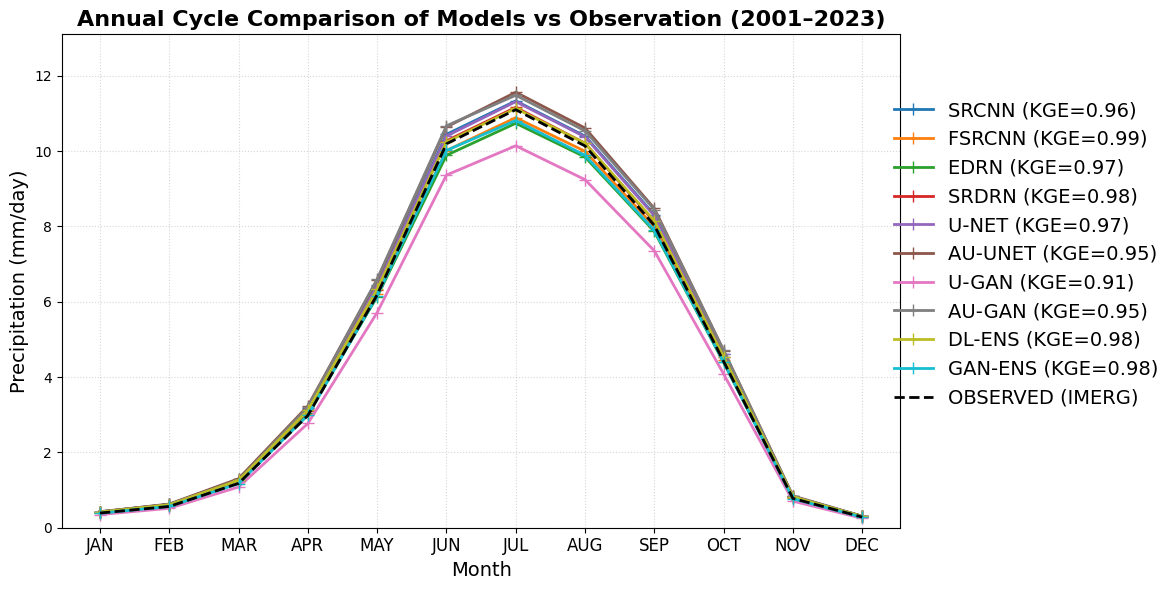

In [21]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import hydroeval as he

# KGE function
def kling_gupta_efficiency(y_true, y_pred):
    evaluations = y_true[~np.isnan(y_true)].flatten()
    simulations = y_pred[~np.isnan(y_pred)].flatten()    
    kge, r, alpha, beta = he.evaluator(he.kgeprime, simulations, evaluations)
    return kge[0]

# Load dataset
DPATH = "/home/midhunm/AI4KLIM/EXPMNTS/P02A_DeepDown_Generalization/ANALYSE/PLTDATA/FM07_YearMeanClim_AnnCycle"
dpath = f'{DPATH}/DATA_YMONMEAN_FLDMEAN_2001_2023.nc'
ds = xr.open_dataset(dpath)

# Define models and labels
models_dict = {
    'E01_M00': 'SRCNN',
    'E01_M01': 'FSRCNN',
    'E01_M02': 'EDRN',
    'E01_M03': 'SRDRN',
    'E01_M04': 'U-NET',
    'E01_M05': 'AU-UNET',
    'E01_M07': 'U-GAN',
    'E01_M08': 'AU-GAN',
    'E01_END': 'DL-ENS',
    'E01_ENG': 'GAN-ENS',
}

# Paul Tol colorblind-friendly palette (8 colors)
colors = [
    '#1f77b4',  # blue
    '#ff7f0e',  # orange
    '#2ca02c',  # green
    '#d62728',  # red
    '#9467bd',  # purple
    '#8c564b',  # brown
    '#e377c2',  # pink
    '#7f7f7f',  # gray
    '#bcbd22',  # olive
    '#17becf',   # cyan
]


# Extract reference
ref = ds['REF'].values.flatten()

# Plotting setup
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
          'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
x = np.arange(12)

# Create figure
plt.figure(figsize=(12, 6))

# Plot model lines with '+' markers
for i, (key, model_label) in enumerate(models_dict.items()):
    model_vals = ds[key].values.flatten()
    kge = kling_gupta_efficiency(model_vals, ref)
    label = f"{model_label} (KGE={kge:.2f})"
    plt.plot(x, model_vals, label=label, color=colors[i % len(colors)],
             linewidth=2, marker='+', markersize=8)

# Plot reference line
plt.plot(x, ref, linestyle='--', color='black', linewidth=2, label='OBSERVED (IMERG)')

# Customize plot
plt.xticks(ticks=x, labels=months, fontsize=12)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Precipitation (mm/day)', fontsize=14)
plt.title('Annual Cycle Comparison of Models vs Observation (2001–2023)', fontsize=16, fontweight='bold')
plt.legend(fontsize=14, loc='upper center', ncol=1, bbox_to_anchor=(1.15, 0.9), frameon=False)
plt.ylim(0, np.max(ref) + 2)
plt.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()

# Optional save
# plt.savefig('/your/output/path/Figure_AnnualCycle_KGE_Colorblind.jpg', dpi=300)

plt.show()


## b) Annual Cycle - Daily

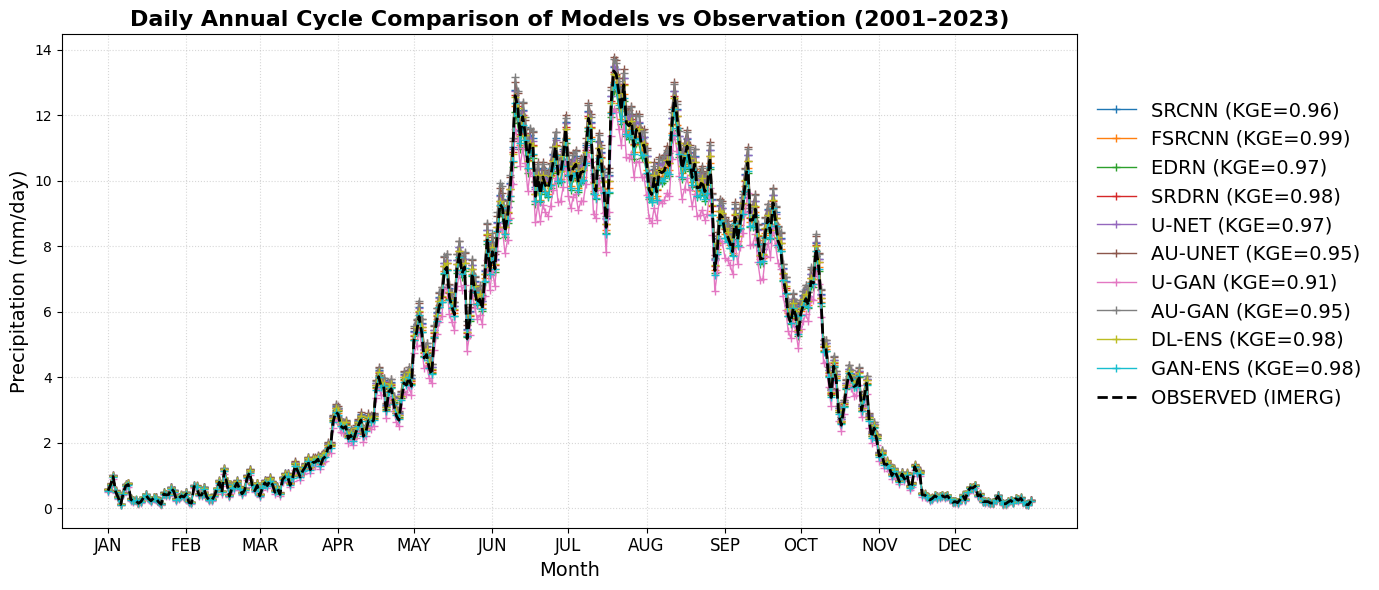

In [20]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import hydroeval as he

# KGE function
def kling_gupta_efficiency(y_true, y_pred):
    evaluations = y_true[~np.isnan(y_true)].flatten()
    simulations = y_pred[~np.isnan(y_pred)].flatten()
    kge, r, alpha, beta = he.evaluator(he.kgeprime, simulations, evaluations)
    return kge[0]

# Load dataset
DPATH = "/home/midhunm/AI4KLIM/EXPMNTS/P02A_DeepDown_Generalization/ANALYSE/PLTDATA/FM07_YearMeanClim_AnnCycle"
dpath = f'{DPATH}/DATA_YDAYMEAN_FLDMEAN_2001_2023.nc'  # assumed file with 366 values
ds = xr.open_dataset(dpath)

# Define models and labels
models_dict = {
    'E01_M00': 'SRCNN',
    'E01_M01': 'FSRCNN',
    'E01_M02': 'EDRN',
    'E01_M03': 'SRDRN',
    'E01_M04': 'U-NET',
    'E01_M05': 'AU-UNET',
    'E01_M07': 'U-GAN',
    'E01_M08': 'AU-GAN',
    'E01_END': 'DL-ENS',
    'E01_ENG': 'GAN-ENS',
}

# Color palette
colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
]

# Extract reference
ref = ds['REF'].values.flatten()

# X-axis setup
x = np.arange(366)

# Month start day indices for a leap year (0-based index)
month_starts = [0, 31, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
month_labels = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
                'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

# Plotting
plt.figure(figsize=(14, 6))

for i, (key, model_label) in enumerate(models_dict.items()):
    model_vals = ds[key].values.flatten()
    kge = kling_gupta_efficiency(model_vals, ref)
    label = f"{model_label} (KGE={kge:.2f})"
    plt.plot(x, model_vals, label=label, color=colors[i % len(colors)],
             linewidth=1, marker='+', markersize=6)

# Plot reference
plt.plot(x, ref, linestyle='--', color='black', linewidth=2, label='OBSERVED (IMERG)')

# X-axis customization
plt.xticks(ticks=month_starts, labels=month_labels, fontsize=12)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Precipitation (mm/day)', fontsize=14)
plt.title('Daily Annual Cycle Comparison of Models vs Observation (2001–2023)', fontsize=16, fontweight='bold')
plt.legend(fontsize=14, loc='upper center', ncol=1, bbox_to_anchor=(1.15, 0.9), frameon=False)

plt.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()

# Optional save
# plt.savefig('/your/output/path/Figure_AnnualCycle_Daily_KGE.jpg', dpi=300)

plt.show()


## Combined Figure 07

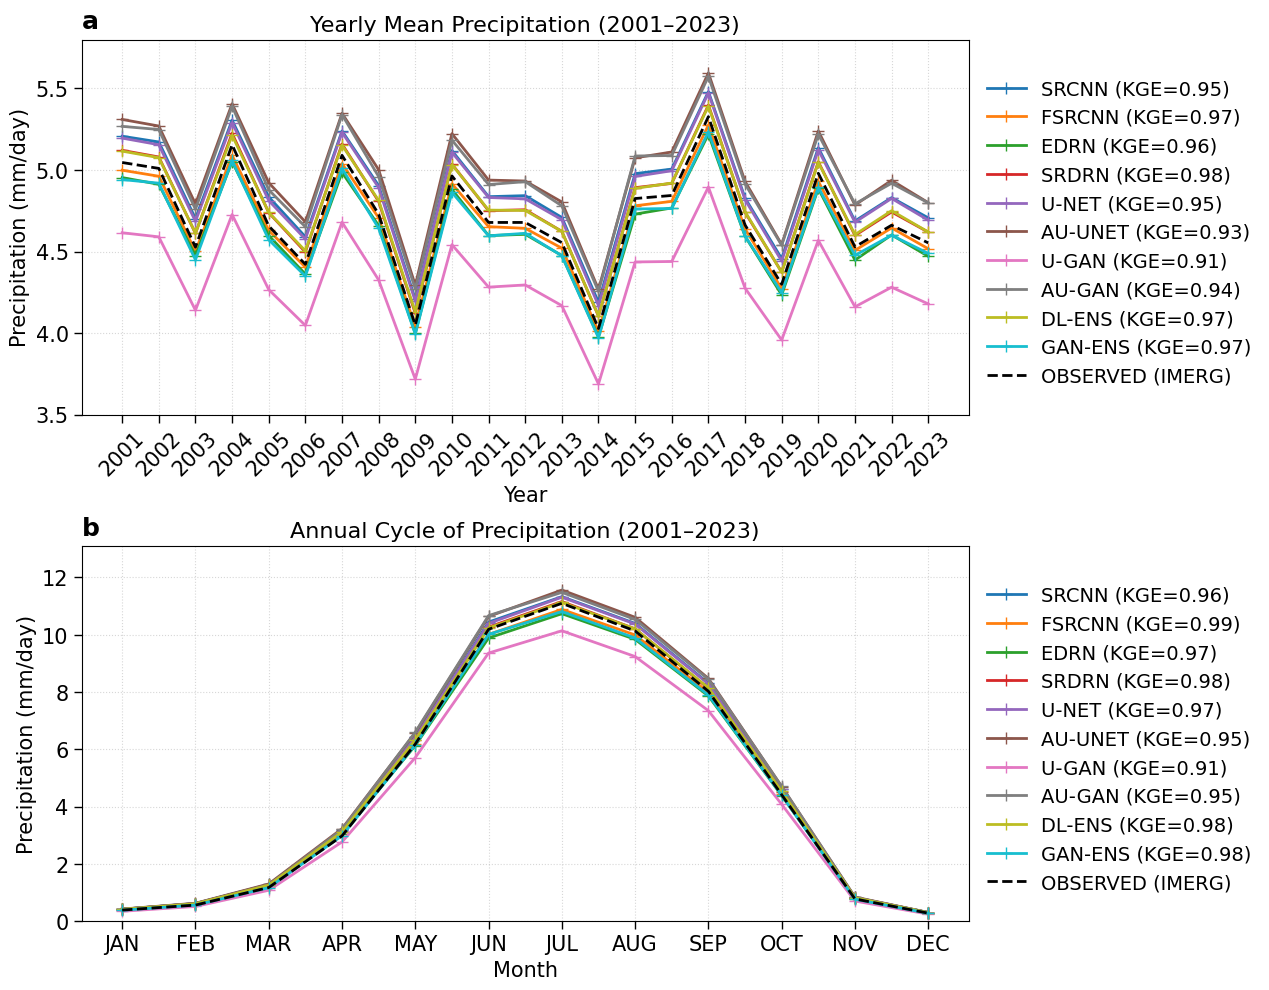

In [42]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import hydroeval as he

# --- KGE Function ---
def kling_gupta_efficiency(y_true, y_pred):
    evaluations = y_true[~np.isnan(y_true)].flatten()
    simulations = y_pred[~np.isnan(y_pred)].flatten()
    kge, r, alpha, beta = he.evaluator(he.kgeprime, simulations, evaluations)
    return kge[0]

def mean_bias_error(y_true, y_pred):
    pass

# --- Common Setup ---
models_dict = {
    'E01_M00': 'SRCNN',
    'E01_M01': 'FSRCNN',
    'E01_M02': 'EDRN',
    'E01_M03': 'SRDRN',
    'E01_M04': 'U-NET',
    'E01_M05': 'AU-UNET',
    'E01_M07': 'U-GAN',
    'E01_M08': 'AU-GAN',
    'E01_END': 'DL-ENS',
    'E01_ENG': 'GAN-ENS',
}

colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
]

# --- Load datasets ---
DPATH = "/home/midhunm/AI4KLIM/EXPMNTS/P02A_DeepDown_Generalization/ANALYSE/PLTDATA/FM07_YearMeanClim_AnnCycle"
ds_year = xr.open_dataset(f"{DPATH}/DATA_YEARMEAN_FLDMEAN_2001_2023.nc")
ds_month = xr.open_dataset(f"{DPATH}/DATA_YMONMEAN_FLDMEAN_2001_2023.nc")

# --- Set up figure and axes ---
fig, axes = plt.subplots(2, 1, figsize=(13, 10), sharex=False)

# ===================
# Plot (a) Yearly Mean
# ===================
years = np.arange(2001, 2024)
x_year = np.arange(len(years))
ref_year = ds_year['REF'].values.flatten()

for i, (key, label) in enumerate(models_dict.items()):
    vals = ds_year[key].values.flatten()
    kge = kling_gupta_efficiency(vals, ref_year)
    mbe = mean_bias_error(vals, ref_year)
    axes[0].plot(x_year, vals, label=f"{label} (KGE={kge:.2f}) (MBE={mbe:.2f})",
                 color=colors[i % len(colors)], linewidth=2, marker='+', markersize=8)

axes[0].plot(x_year, ref_year, linestyle='--', color='black', linewidth=2, label='OBSERVED (IMERG)')
axes[0].set_xticks(x_year)
axes[0].set_xticklabels(years, rotation=45, fontsize=15)
axes[0].set_xlabel('Year', fontsize=15)
axes[0].set_ylabel('Precipitation (mm/day)', fontsize=15)
axes[0].set_title('Yearly Mean Precipitation (2001–2023)', fontsize=16, fontweight='normal')
axes[0].grid(True, linestyle=':', alpha=0.5)
axes[0].set_ylim(3.5, 5.8)
axes[0].tick_params(axis='both', which='major', labelsize=15, length=6, width=1)
axes[0].legend(fontsize=14, loc='upper center', ncol=1, bbox_to_anchor=(1.17, 0.94), frameon=False)

# =====================
# Plot (b) Monthly Mean
# =====================
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
          'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
x_month = np.arange(12)
ref_month = ds_month['REF'].values.flatten()

for i, (key, label) in enumerate(models_dict.items()):
    vals = ds_month[key].values.flatten()
    kge = kling_gupta_efficiency(vals, ref_month)
    mbe = mean_bias_error(vals, ref_year)
    axes[1].plot(x_month, vals, label=f"{label} (KGE={kge:.2f}) (MBE={mbe:.2f})",
                 color=colors[i % len(colors)], linewidth=2, marker='+', markersize=8)

axes[1].plot(x_month, ref_month, linestyle='--', color='black', linewidth=2, label='OBSERVED (IMERG)')
axes[1].set_xticks(x_month)
axes[1].set_xticklabels(months, fontsize=12)
axes[1].set_xlabel('Month', fontsize=15)
axes[1].set_ylabel('Precipitation (mm/day)', fontsize=15)
axes[1].set_title('Annual Cycle of Precipitation (2001–2023)', fontsize=16, fontweight='normal')
axes[1].grid(True, linestyle=':', alpha=0.5)
axes[1].set_ylim(0, np.max(ref_month) + 2)
axes[1].tick_params(axis='both', which='major', labelsize=15, length=6, width=1)
axes[1].legend(fontsize=14, loc='upper center', ncol=1, bbox_to_anchor=(1.17, 0.94), frameon=False)

axes[0].text(0, 1.03, 'a', transform=axes[0].transAxes, fontsize=18, fontweight='bold')
axes[1].text(0, 1.03, 'b', transform=axes[1].transAxes, fontsize=18, fontweight='bold')

# Final layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.35)

# Show/Save the plot
save_dir = '/home/midhunm/AI4KLIM/EXPMNTS/P02A_DeepDown_Generalization/ANALYSE/RESULTS'
# plt.savefig(f'{save_dir}/Figure07.jpg', format = 'jpg', dpi=500, bbox_inches='tight',facecolor='w', edgecolor='w')
plt.show()


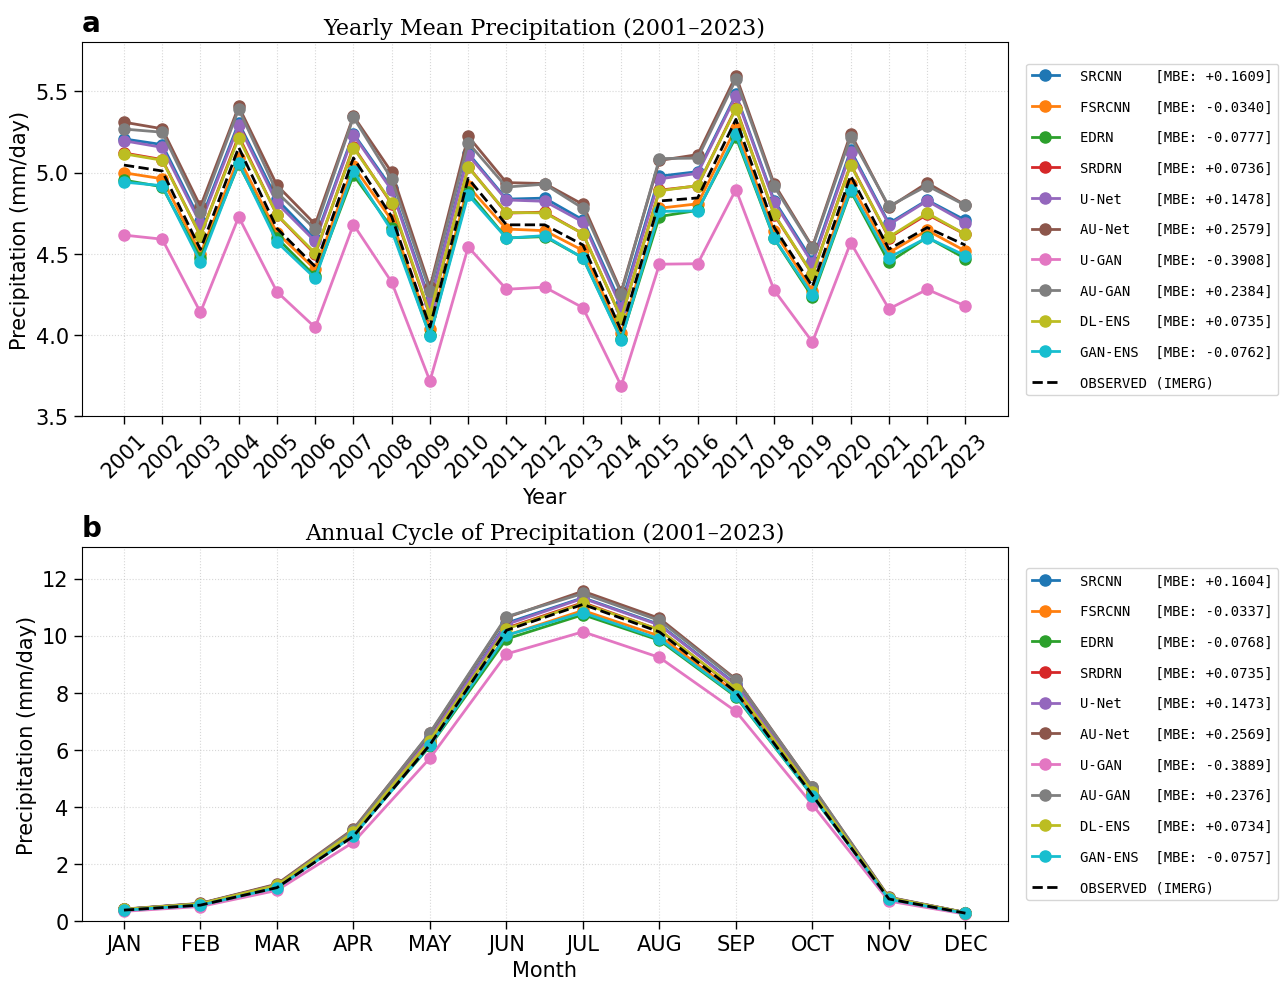

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import hydroeval as he

# --- KGE Function ---
def kling_gupta_efficiency(y_true, y_pred):
    evaluations = y_true[~np.isnan(y_true)].flatten()
    simulations = y_pred[~np.isnan(y_pred)].flatten()
    kge, r, alpha, beta = he.evaluator(he.kgeprime, simulations, evaluations)
    return kge[0]

# --- MBE Function ---
def mean_bias_error(y_true, y_pred):
    mask = ~np.isnan(y_true) & ~np.isnan(y_pred)
    return np.mean(y_pred[mask] - y_true[mask])

def percent_bias(y_true, y_pred):
    mask = ~np.isnan(y_true) & ~np.isnan(y_pred)
    numerator = np.sum(y_pred[mask] - y_true[mask])
    denominator = np.sum(y_true[mask])
    return 100.0 * numerator / denominator

# --- Common Setup ---
models_dict = {
    'E01_M00': 'SRCNN',
    'E01_M01': 'FSRCNN',
    'E01_M02': 'EDRN',
    'E01_M03': 'SRDRN',
    'E01_M04': 'U-Net',
    'E01_M05': 'AU-Net',
    'E01_M07': 'U-GAN',
    'E01_M08': 'AU-GAN',
    'E01_END': 'DL-ENS',
    'E01_ENG': 'GAN-ENS',
}

colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
]

# --- Load datasets ---
DPATH = "/home/midhunm/AI4KLIM/EXPMNTS/P02A_DeepDown_Generalization/ANALYSE/PLTDATA/FM07_YearMeanClim_AnnCycle"
ds_year = xr.open_dataset(f"{DPATH}/DATA_YEARMEAN_FLDMEAN_2001_2023.nc")
ds_month = xr.open_dataset(f"{DPATH}/DATA_YMONMEAN_FLDMEAN_2001_2023.nc")

# --- Set up figure and axes ---
fig, axes = plt.subplots(2, 1, figsize=(13, 10), sharex=False)

# ===================
# Plot (a) Yearly Mean
# ===================
years = np.arange(2001, 2024)
x_year = np.arange(len(years))
ref_year = ds_year['REF'].values.flatten()

for i, (key, label_text) in enumerate(models_dict.items()):
    vals = ds_year[key].values.flatten()
    # kge = kling_gupta_efficiency(vals, ref_year)
    mbe_a = mean_bias_error(ref_year, vals)
    pbias_a = percent_bias(ref_year, vals)
    # label = f"{label_text:<8}  KGE: {kge:>5.2f}   MBE: {mbe:+6.2f}"
    label = f"{label_text:<8} [MBE: {mbe_a:+4.4f}]"
    axes[0].plot(x_year, vals, label=label,
                 color=colors[i % len(colors)], linewidth=2, marker='o', markersize=8)

axes[0].plot(x_year, ref_year, linestyle='--', color='black', linewidth=2, label='OBSERVED (IMERG)')
axes[0].set_xticks(x_year)
axes[0].set_xticklabels(years, rotation=45, fontsize=15)
axes[0].set_xlabel('Year', fontsize=15)
axes[0].set_ylabel('Precipitation (mm/day)', fontsize=15)
axes[0].set_title('Yearly Mean Precipitation (2001–2023)', fontsize=16, fontfamily='serif',  fontweight='normal')
axes[0].grid(True, linestyle=':', alpha=0.5)
axes[0].set_ylim(3.5, 5.8)
axes[0].tick_params(axis='both', which='major', labelsize=15, length=6, width=1)
axes[0].legend(
    fontsize=14,
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    frameon=True,
    borderaxespad=0.0,
    handlelength=2,
    handletextpad=1.5,
    labelspacing=1.2,
    prop={'family': 'monospace'}
)


# =====================
# Plot (b) Monthly Mean
# =====================
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
          'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
x_month = np.arange(12)
ref_month = ds_month['REF'].values.flatten()

for i, (key, label_text) in enumerate(models_dict.items()):
    vals = ds_month[key].values.flatten()
    # kge = kling_gupta_efficiency(vals, ref_month)
    mbe_b = mean_bias_error(ref_month, vals)
    # pbias_b = percent_bias(ref_month, vals)
    # label = f"{label_text:<8}  KGE: {kge:>5.2f}   MBE: {mbe:+6.2f}"
    label = f"{label_text:<8} [MBE: {mbe_b:+4.4f}]"
    axes[1].plot(x_month, vals, label=label,
                 color=colors[i % len(colors)], linewidth=2, marker='o', markersize=8)

axes[1].plot(x_month, ref_month, linestyle='--', color='black', linewidth=2, label='OBSERVED (IMERG)')
axes[1].set_xticks(x_month)
axes[1].set_xticklabels(months, fontsize=15)
axes[1].set_xlabel('Month', fontsize=15)
axes[1].set_ylabel('Precipitation (mm/day)', fontsize=15)
axes[1].set_title('Annual Cycle of Precipitation (2001–2023)', fontsize=16, fontfamily='serif', fontweight='normal')
axes[1].grid(True, linestyle=':', alpha=0.5)
axes[1].set_ylim(0, np.max(ref_month) + 2)
axes[1].tick_params(axis='both', which='major', labelsize=15, length=6, width=1)
# axes[1].legend(fontsize=12, loc='upper center', ncol=1, bbox_to_anchor=(1.19, 0.92), frameon=False)
axes[1].legend(
    fontsize=14,
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    frameon=True,
    borderaxespad=0.0,
    handlelength=2,
    handletextpad=1.5,
    labelspacing=1.2,
    prop={'family': 'monospace'}
)

axes[0].text(0, 1.03, 'a', transform=axes[0].transAxes, fontsize=20, fontweight='bold')
axes[1].text(0, 1.03, 'b', transform=axes[1].transAxes, fontsize=20, fontweight='bold')

# Final layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.35)

# Show/Save the plot
save_dir = '/home/midhunm/AI4KLIM/EXPMNTS/P02A_DeepDown_Generalization/ANALYSE/RESULTS'
# plt.savefig(f'{save_dir}/Figure07_SystematicBias.jpg', format='jpg', dpi=500, bbox_inches='tight', facecolor='w', edgecolor='w')
plt.show()
